# A simple tutorial on the usage of the storystructure module

For this tutorial we assume that the necessary data are going to use the data in the `../data` folder. Two types of data files are required for each storystructure instance, an edgelist and a set of node attributes.


In [1]:
%matplotlib inline
import os
from pathlib import Path
from subprocess import call
import numpy as np
import pandas as pd
from storystructure.storystructure import storystructure
from IPython.display import display, Image
import rpy2.rinterface
from ggplot import *

dataPath = Path.cwd().parent/'data'
figPath = Path.cwd().parent/'figs'
if not os.path.isdir(figPath):
    os.mkdir(figPath)


## Dolmadakia

### Visualize story graph


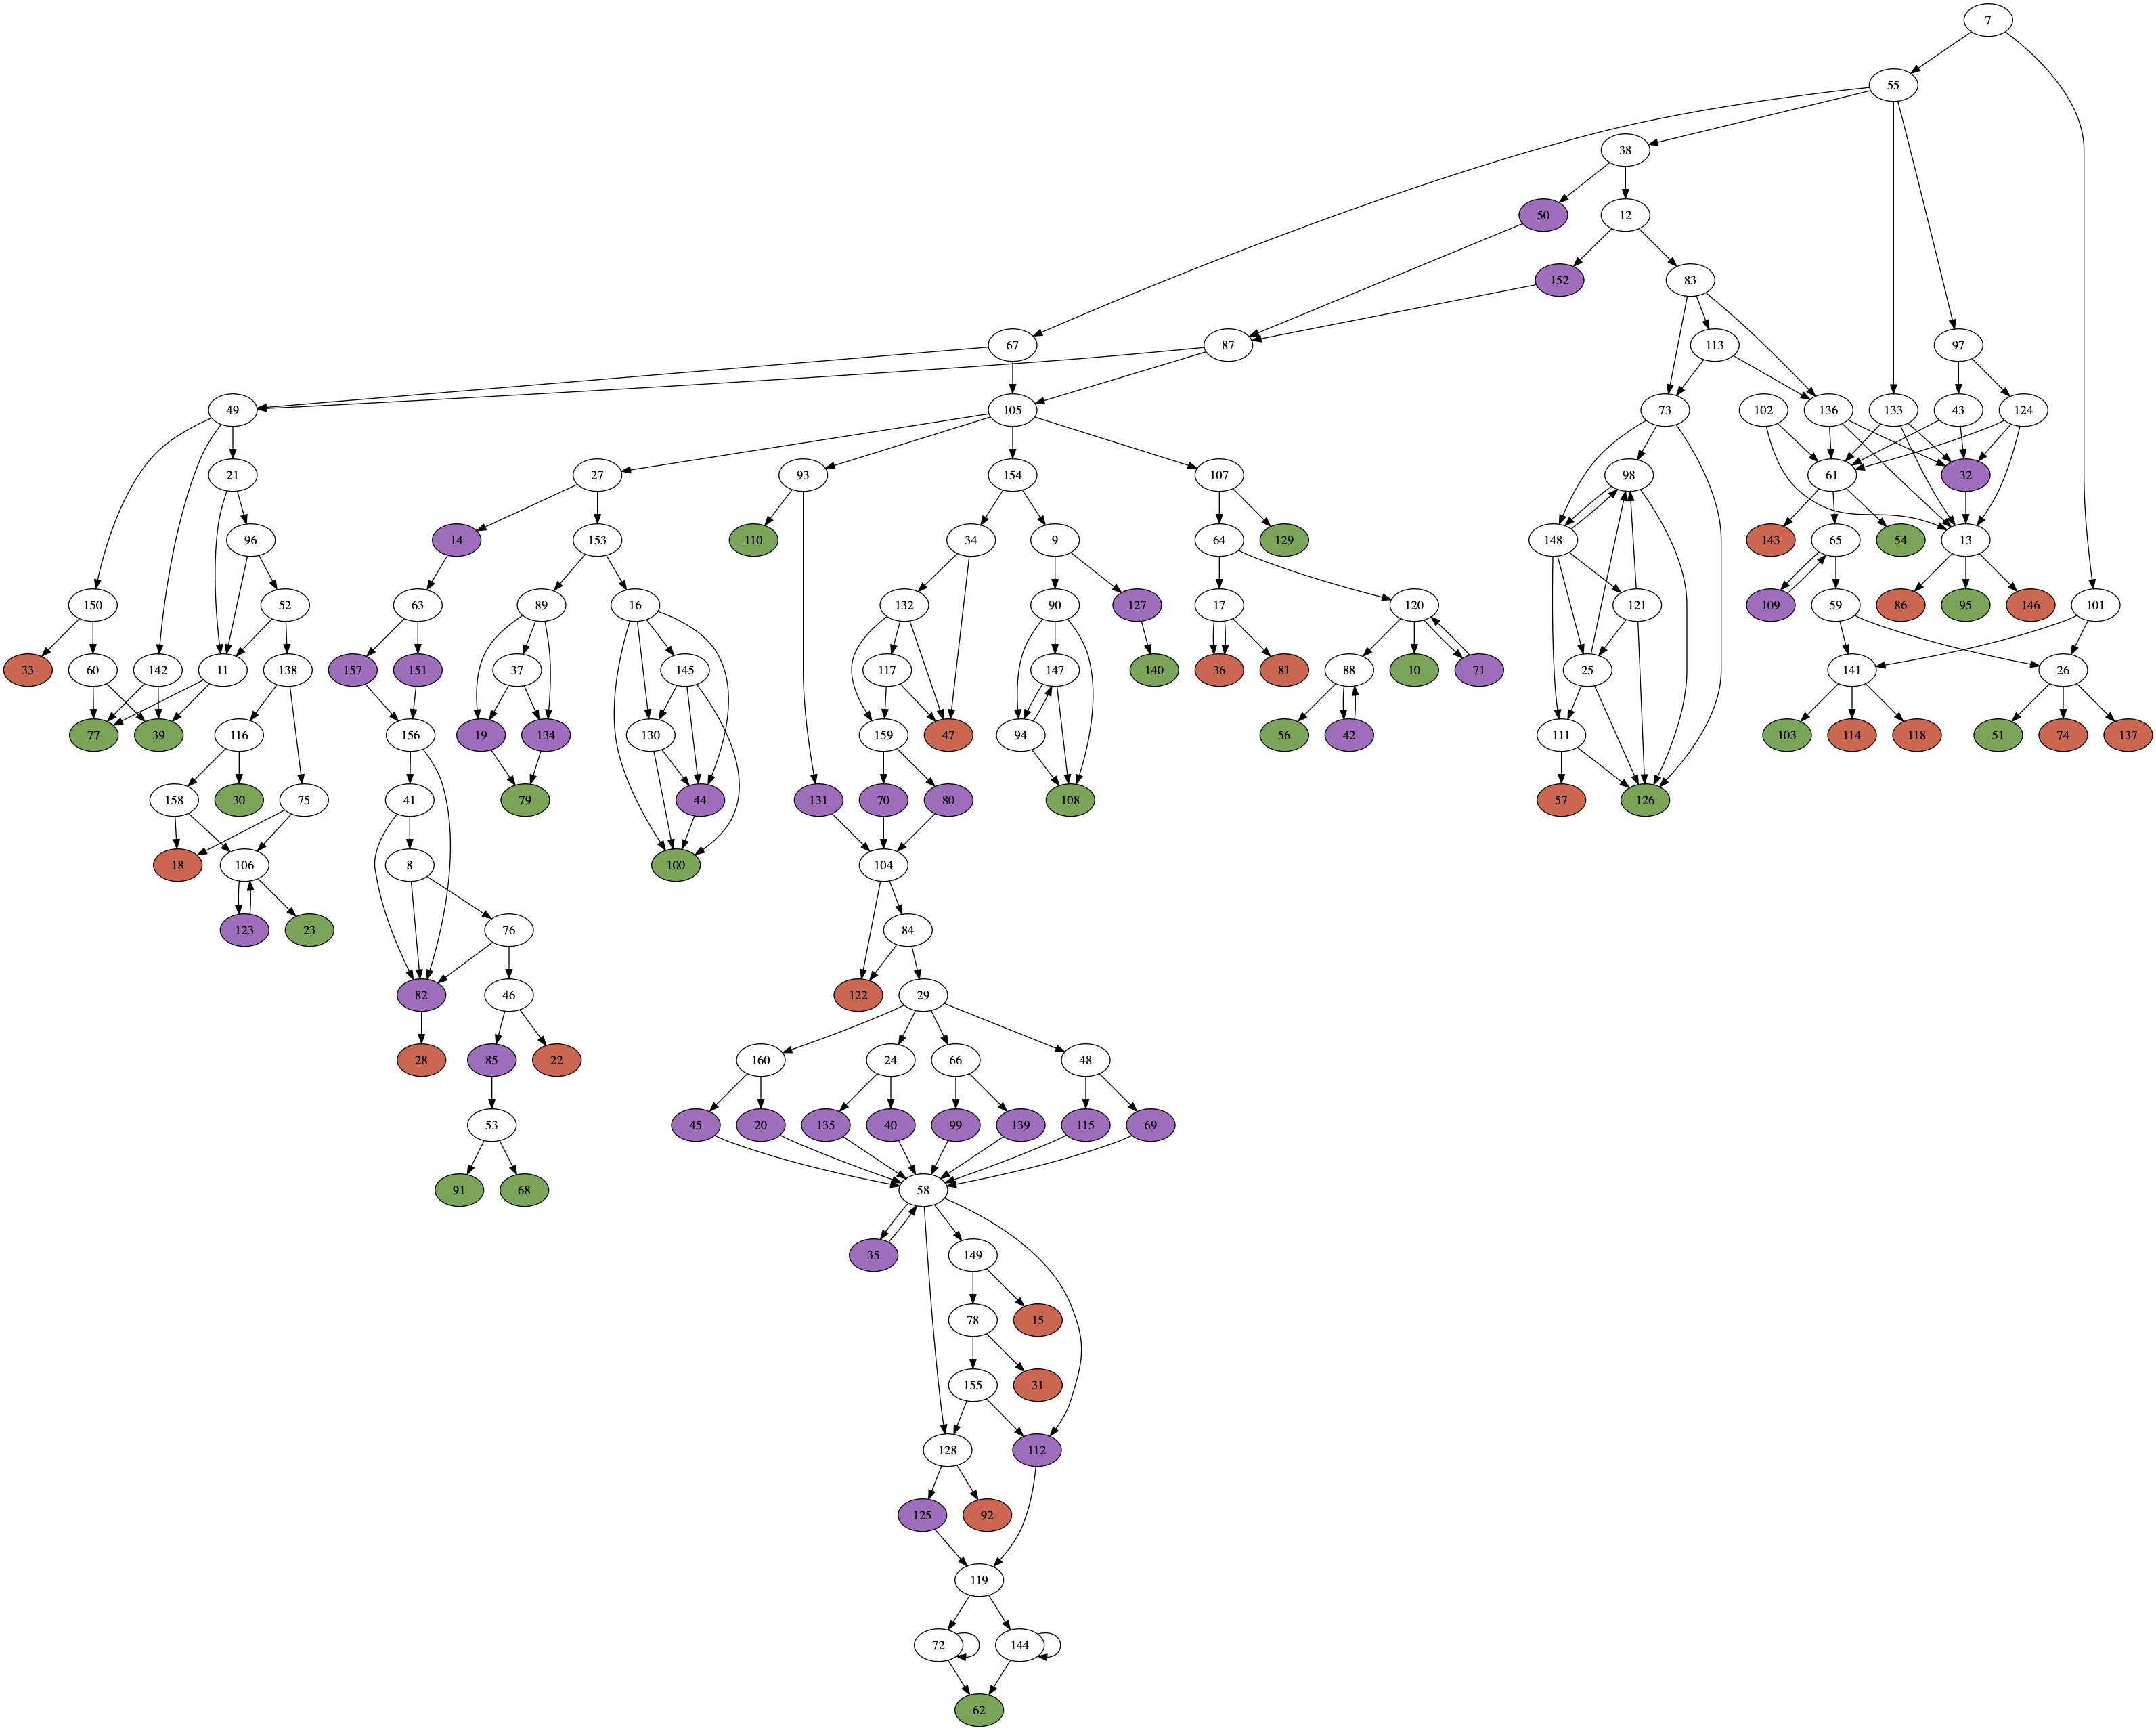

In [2]:
# create a new object
DolmadakiaStoryStructure = storystructure()
# load an edgelist and node attributes
DolmadakiaStoryStructure.loadStory(edges=dataPath/'dolmadakia'/'edgelist.csv',
            nodes=dataPath/'dolmadakia'/'nodeAttributes.csv')
# Make figure
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakia.png')
i = Image(filename=str(figPath/'dolmadakia.png'))
display(i)

### Find problems or interesting features in structure
- Removing self loops
- Removing double edges 

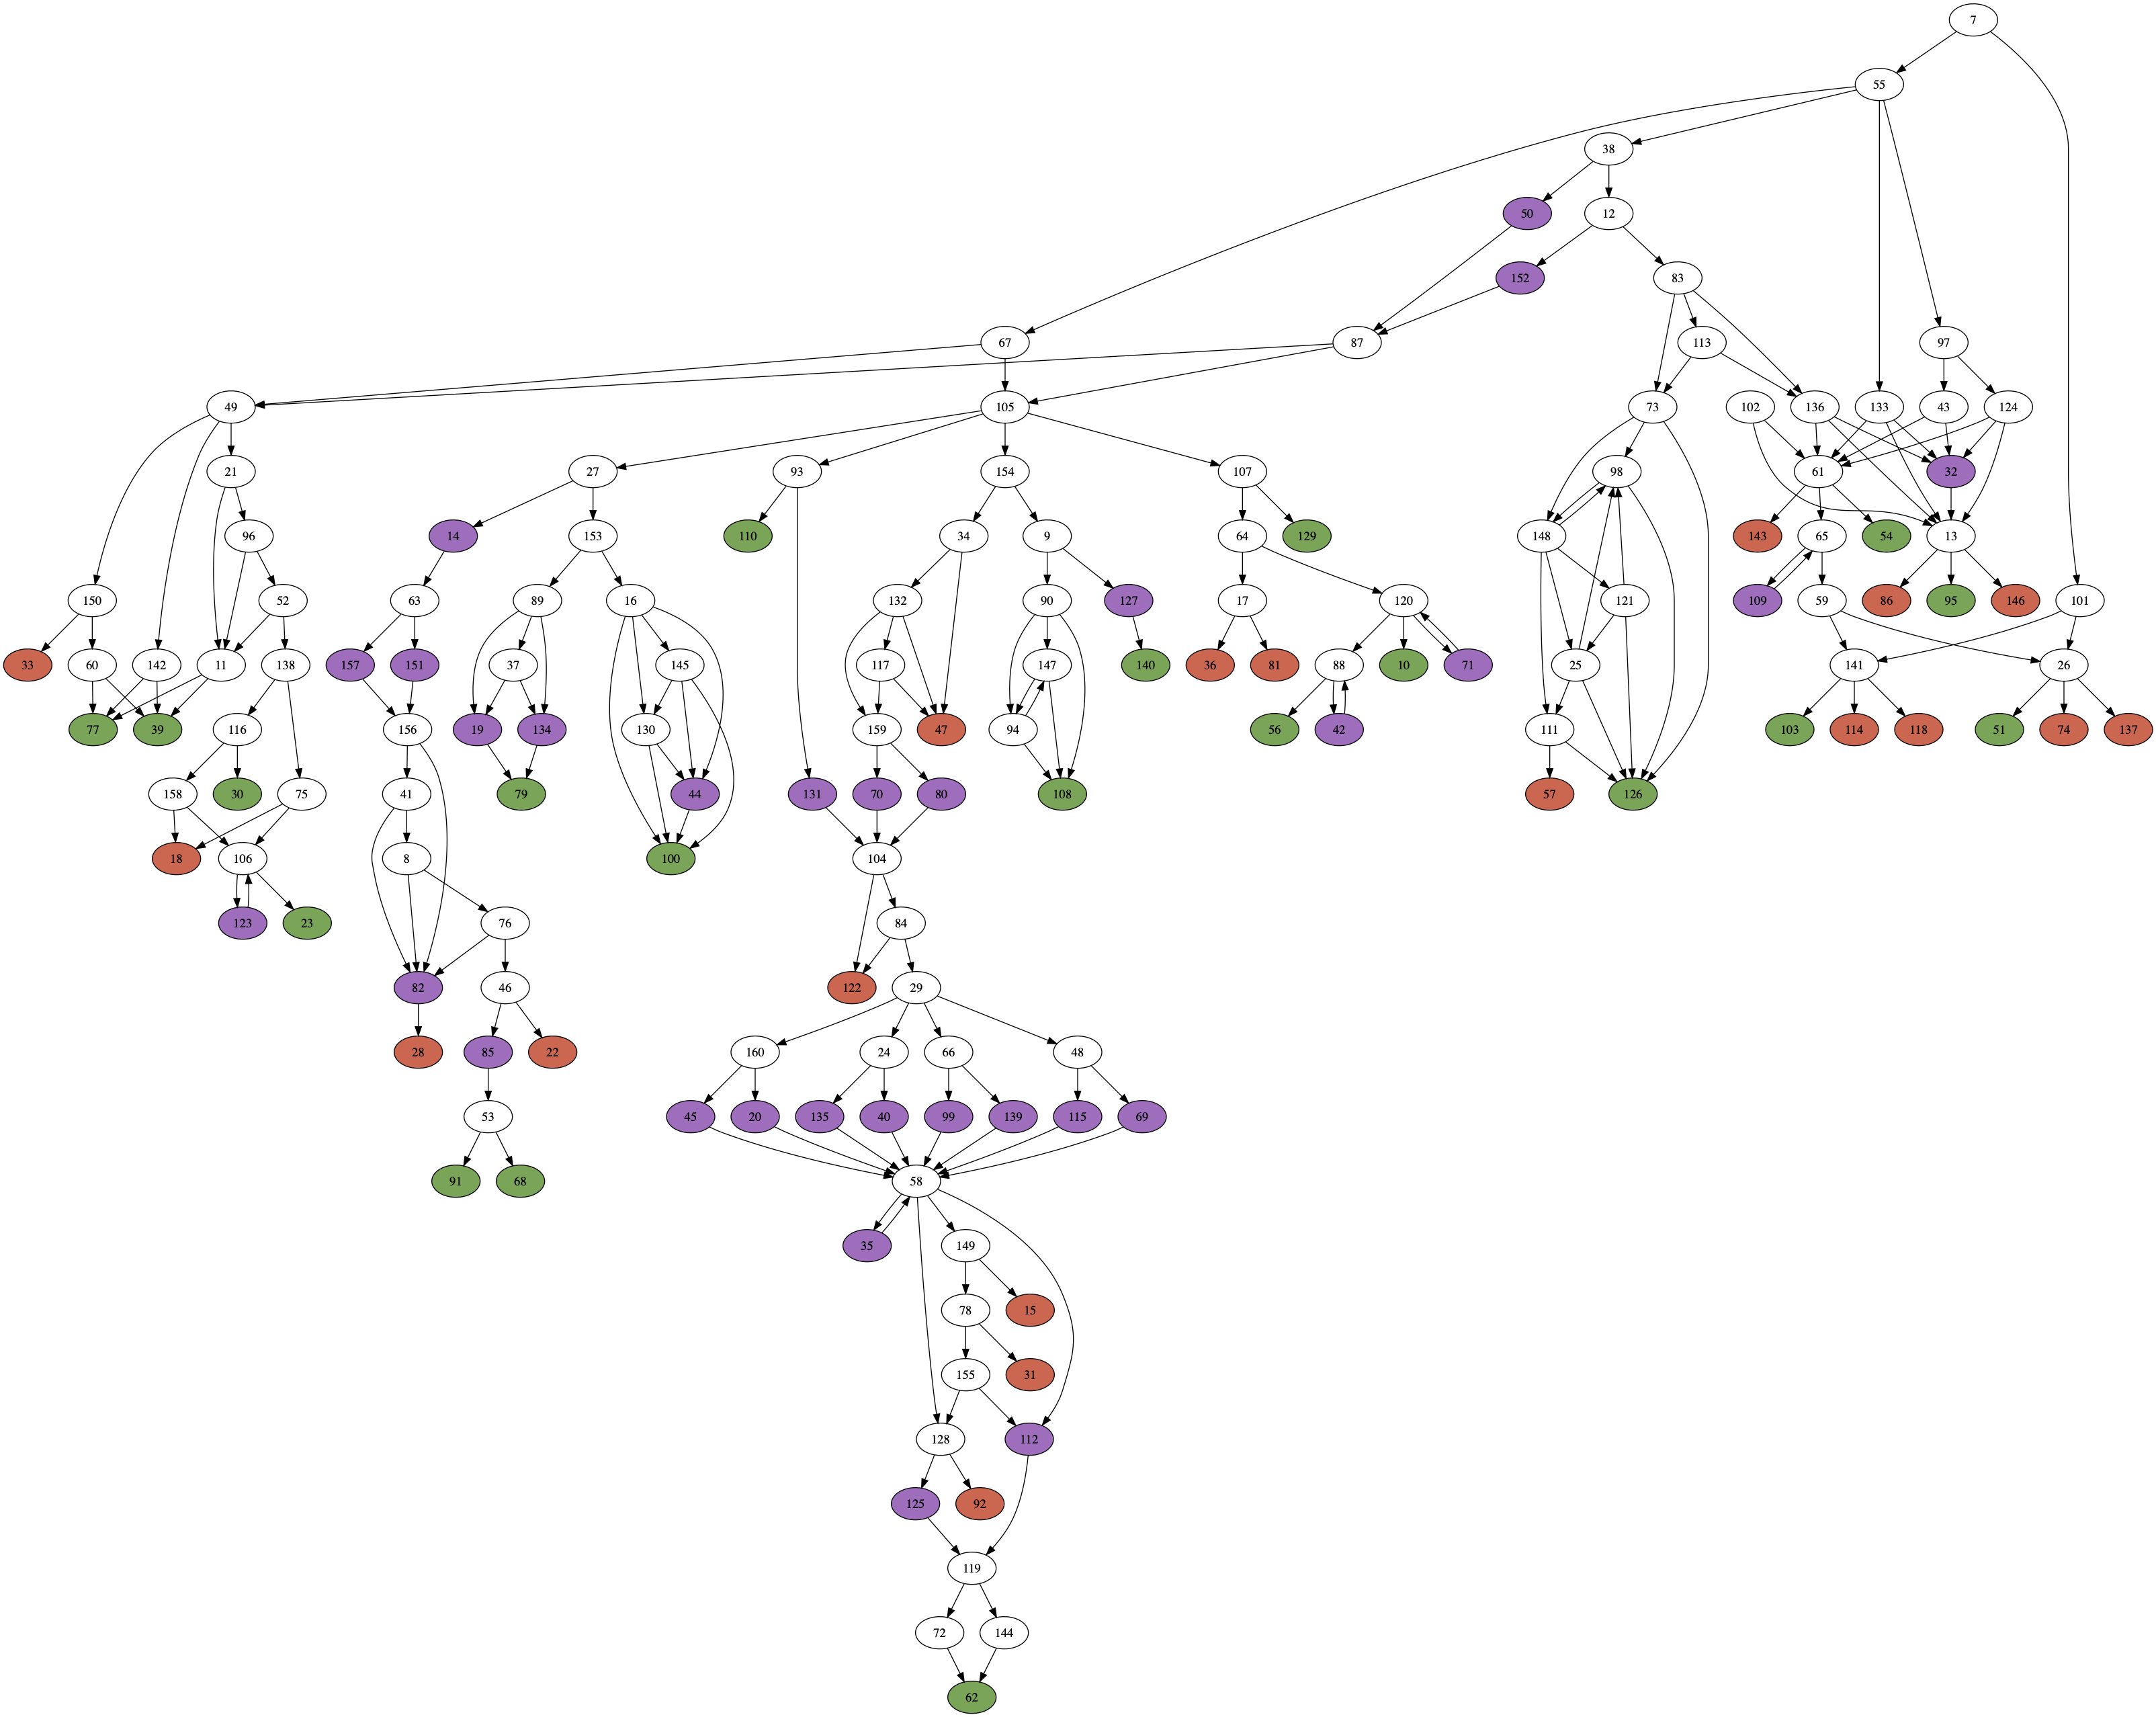

In [3]:
DolmadakiaStoryStructure.simplify()
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakia_simplified.png')
i = Image(filename=str(figPath/'dolmadakia_simplified.png'))
display(i)

## Make DAG graph
The graph has multiple starting nodes (this is an error in the source). The correct start node is page 7

In [4]:
DolmadakiaStoryStructure.makeGraph() 
[node.id for node in DolmadakiaStoryStructure.getStart()]


[7, 102]

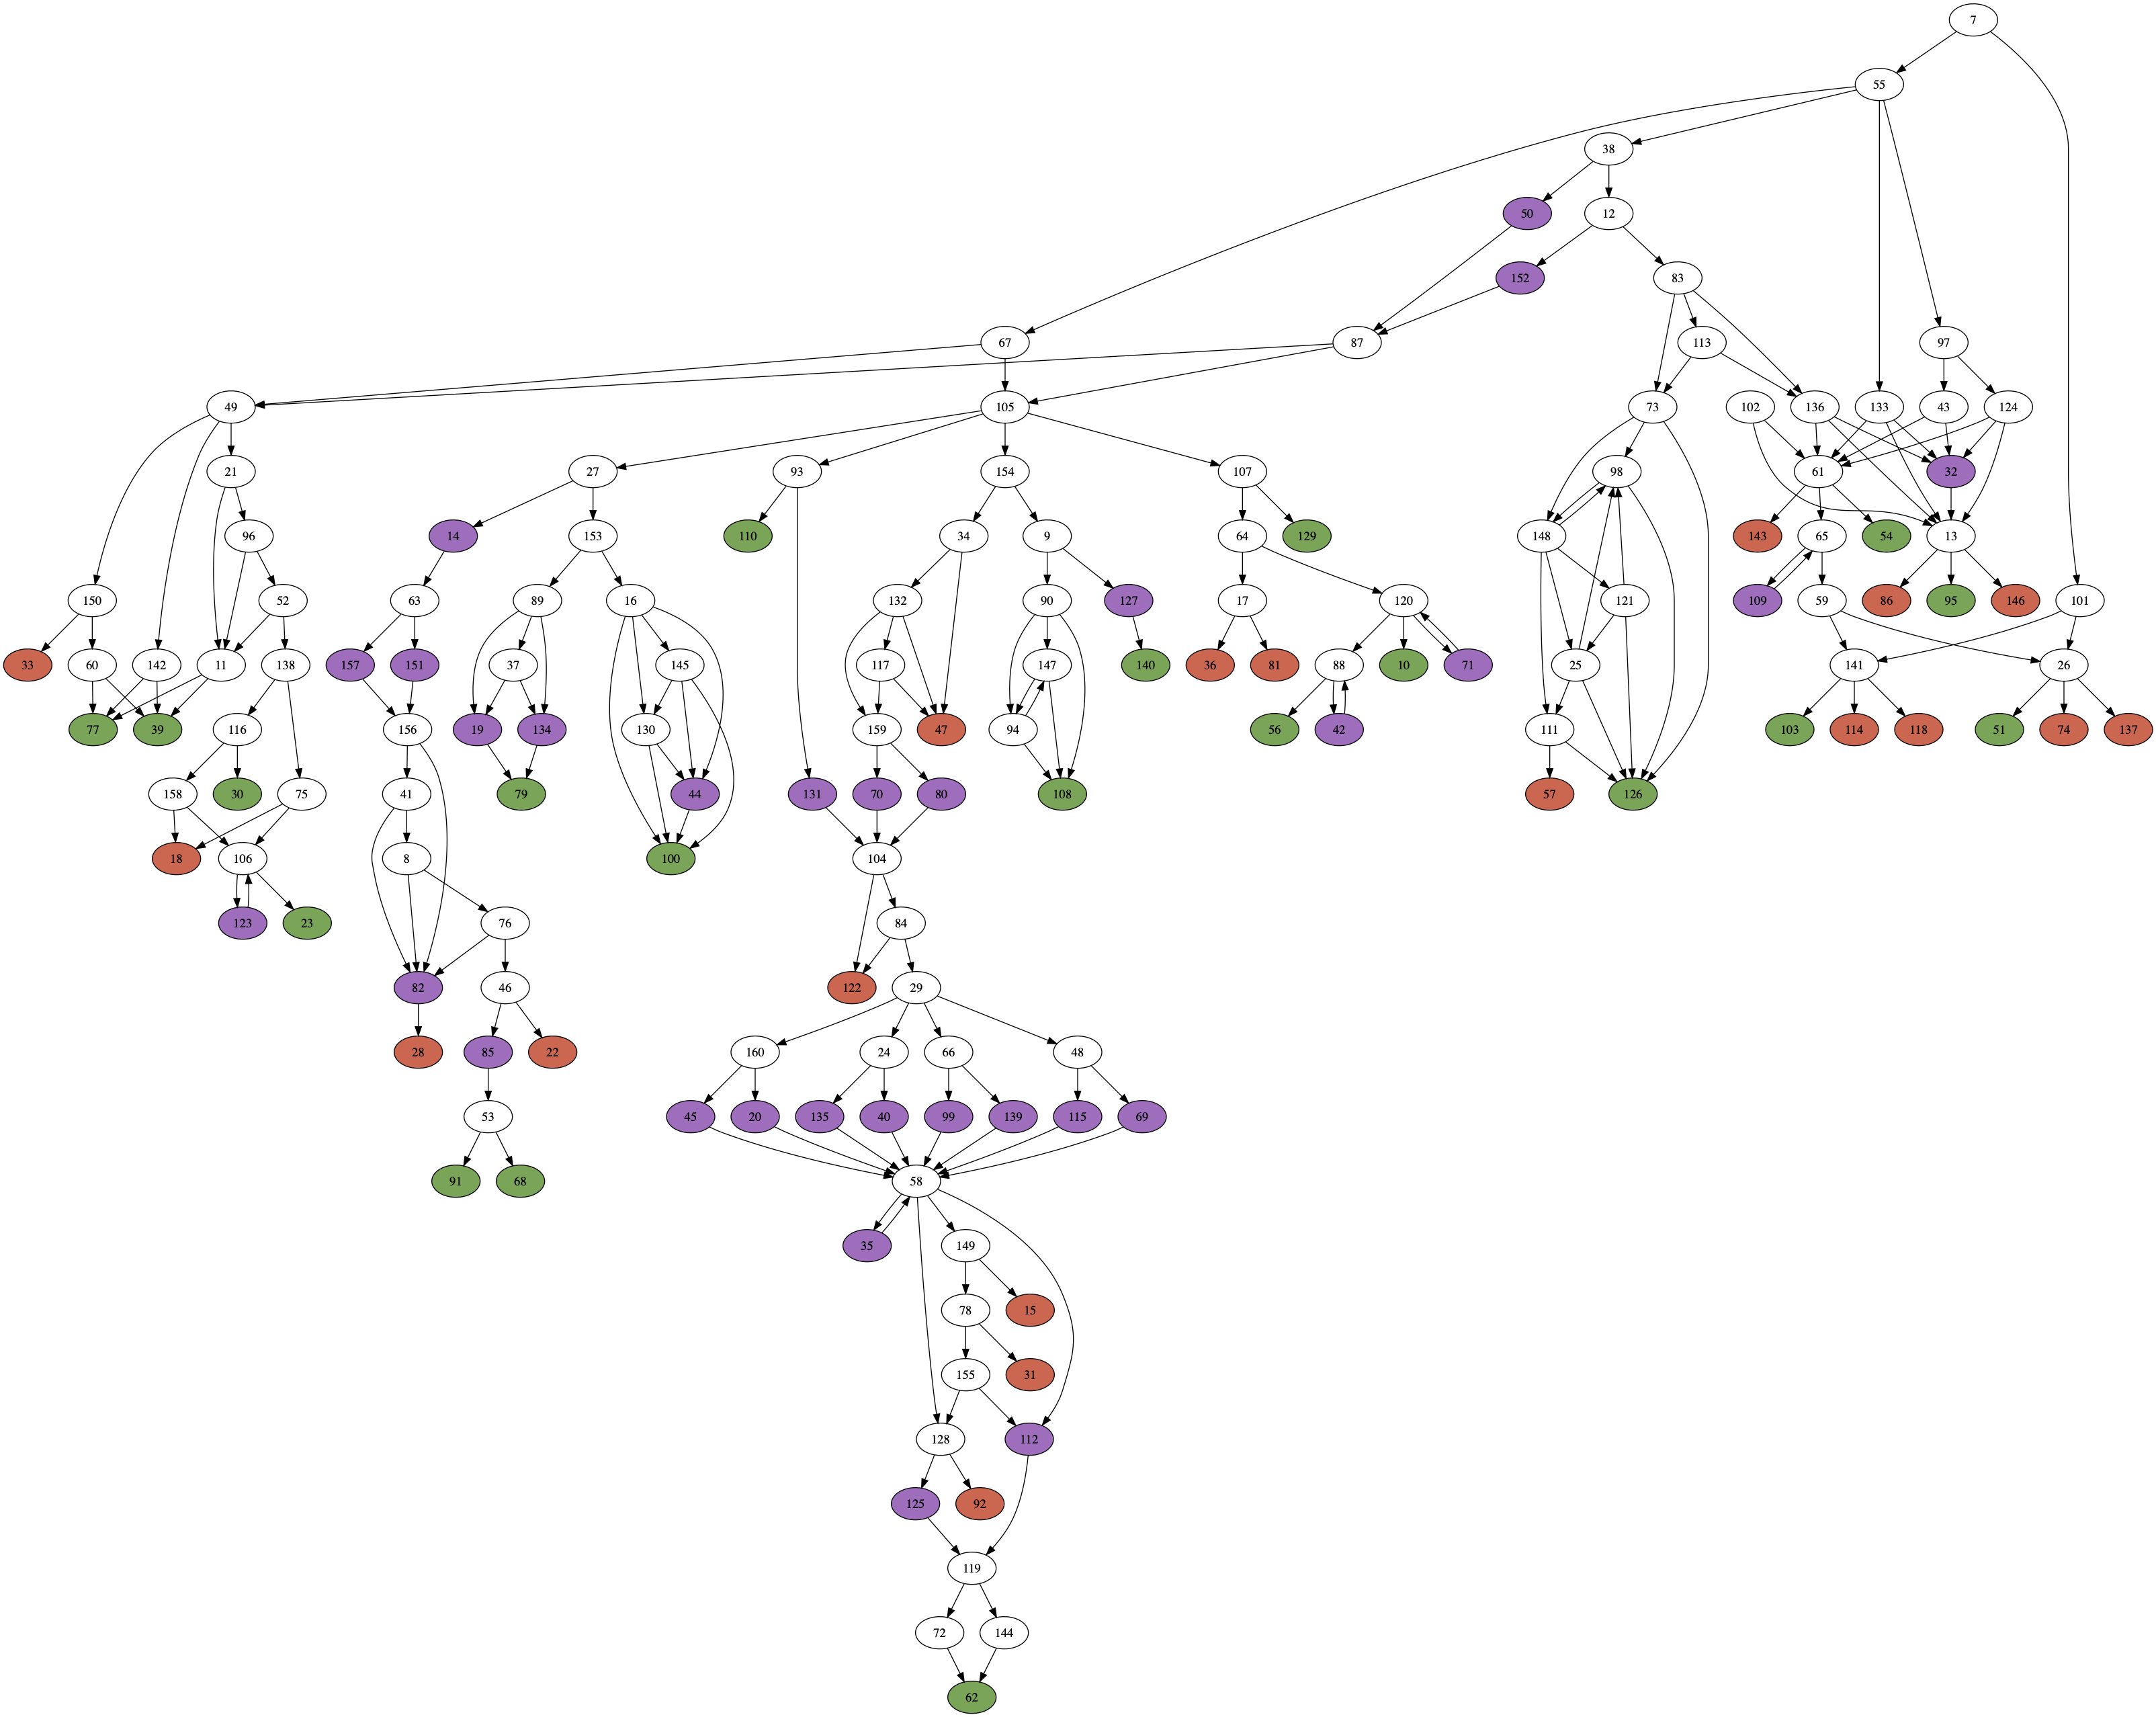

In [5]:
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakia_DAG.png')
i = Image(filename=str(figPath/'dolmadakia_DAG.png'))
display(i)

### Enumerate all possible stories

In [6]:
%%capture
# calculate path statistics starting from root at page 7
DolmadakiaStoryStructure.savePathStats(dataPath/'dolmadakia'/'allPaths.dat', 7)

DolmadakiaStoryStructure.pathsToEdgelist()
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakiaPaths.png',noSingle=True)
i = Image(filename=str(figPath/'dolmadakiaPaths.png'))
display(i)

Having made a direct acyclic graph we can now calculate the total number of alternative stories in the book

In [7]:
allPaths = pd.read_csv(dataPath/'dolmadakia'/'allPaths.dat', sep = "\t", na_values='None')
len(allPaths)

1762

Plot the distribution of story length (number of pages) by type of ending (good or bad)

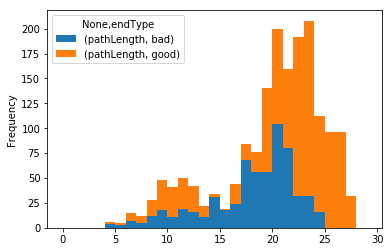

In [8]:
allPaths[['pathLength','endType']].pivot(columns= 'endType').plot(kind='hist', stacked = True, bins = range(30))

Next we can count how many pauses are found in each alternative story path, as expected most stories have a single pause.

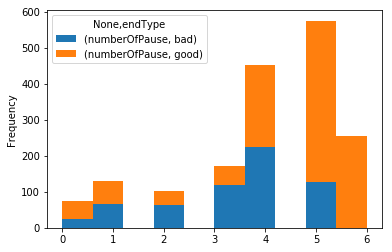

In [9]:
allPaths[['numberOfPause','endType']].pivot(columns= 'endType').plot(kind='hist', stacked = True)

Distribution of number of steps to the first pause by end type.

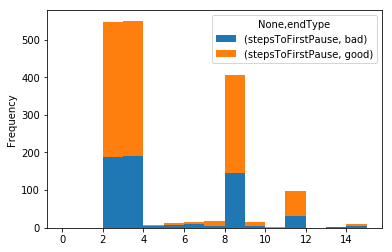

In [10]:
allPaths[['stepsToFirstPause','endType']].pivot(columns= 'endType').plot(kind='hist', stacked = True, bins = range(16))

### Find the number of sub-stories

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


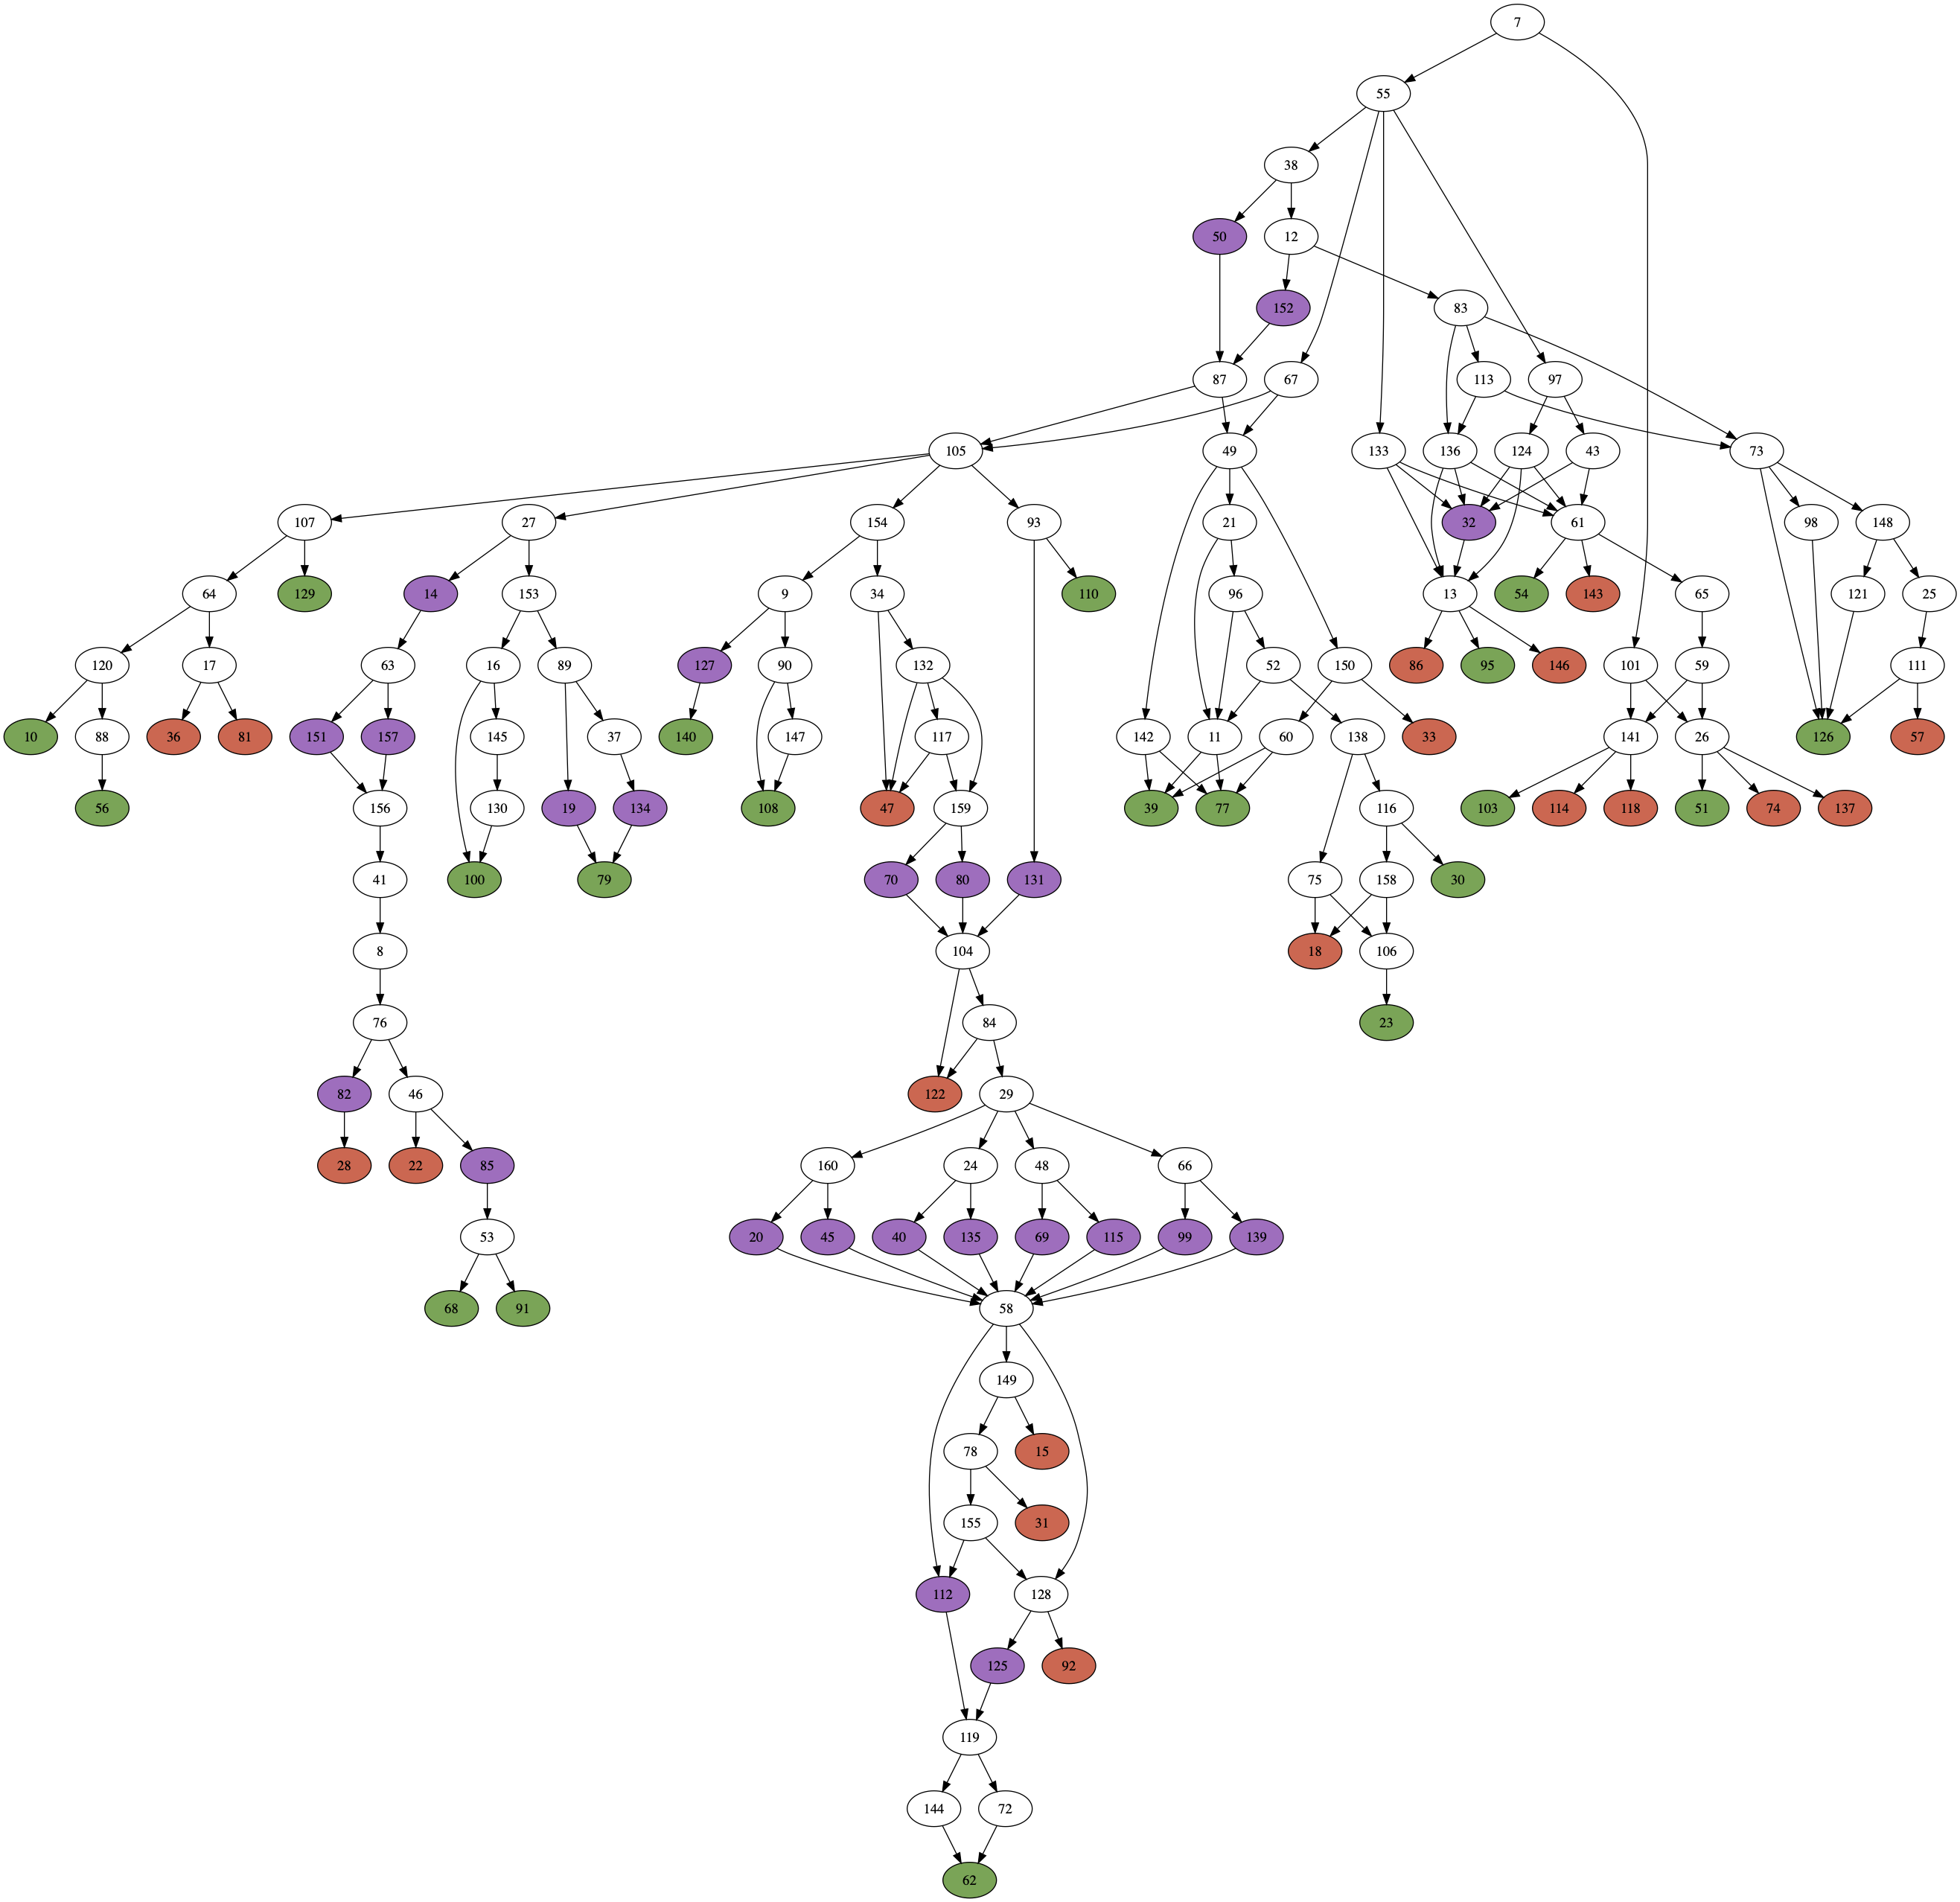

In [11]:
# cluster paths that are more than 10% similar to each other
DolmadakiaStoryStructure.iterativeClusterPaths(0.1)
DolmadakiaStoryStructure.pathsToEdgelist()
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakiaPathsClustered.png', noSingle=True)
i = Image(filename=str(figPath/'dolmadakiaPathsClustered.png'))
display(i)

In [12]:
%%capture
# recalculate paths
DolmadakiaStoryStructure.savePathStats(dataPath/'dolmadakia'/'allPaths.dat', 7)

# Try different thresholds for clustering
thresholds = np.arange(10)/10 + 0.1
CutoffEffect = pd.DataFrame(index=range(len(thresholds)),columns=['Threshold','NumberOfPaths'])

for i, threshold in enumerate(thresholds):
    DolmadakiaStoryStructure.iterativeClusterPaths(threshold)
    CutoffEffect.iloc[i]=[threshold,len(DolmadakiaStoryStructure.paths)]

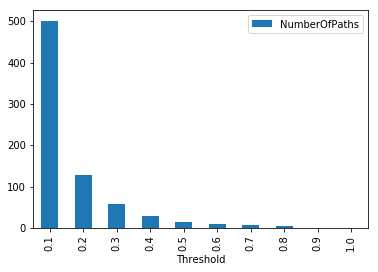

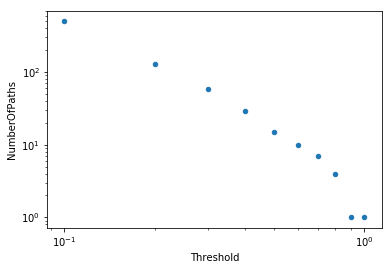

In [13]:
CutoffEffect.to_csv(dataPath/'dolmadakia'/'CutoffEffect.dat',index=False)
CutoffEffect.plot(kind='bar',x='Threshold', y = 'NumberOfPaths')
CutoffEffect.plot(kind='scatter',x='Threshold', y = 'NumberOfPaths',loglog=True)

## Orient Express!

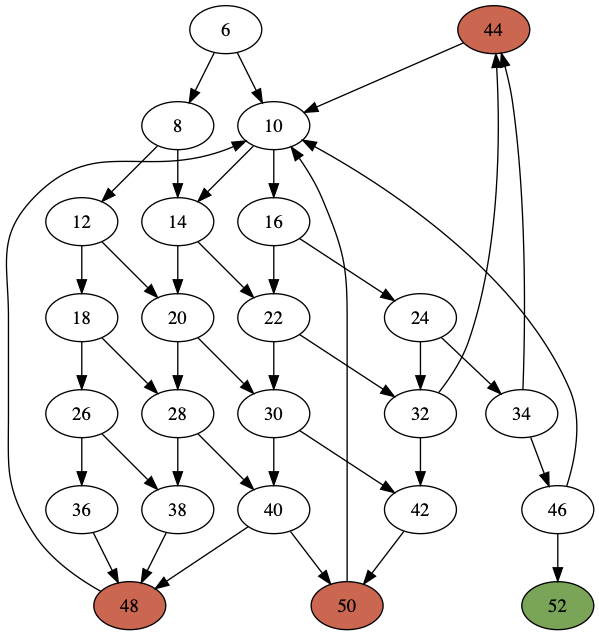

Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped des

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


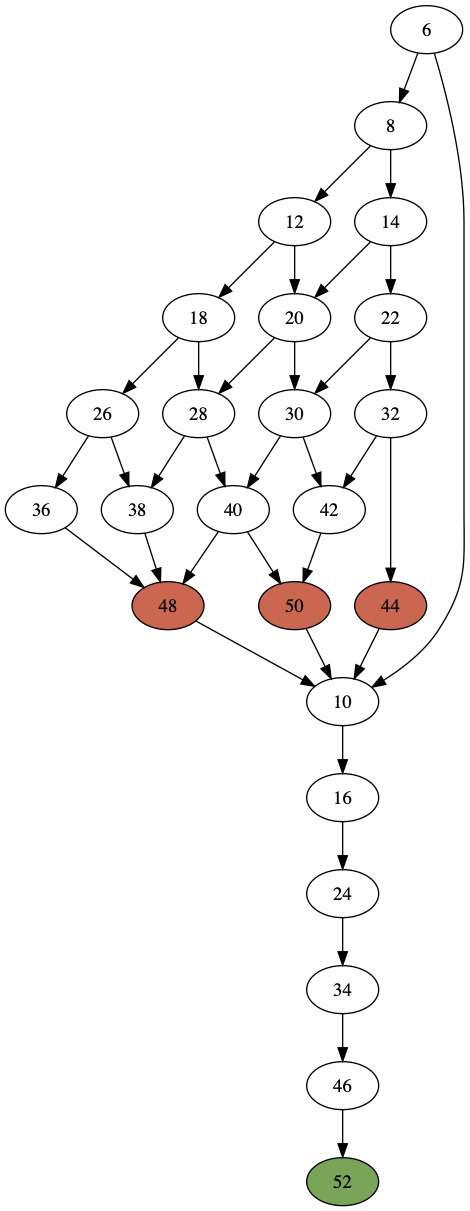

In [14]:
# create a new object
OrientExpressStoryStructure = storystructure()
# load an edgelist and node attributes
OrientExpressStoryStructure.loadStory(edges=dataPath/'orientExpress'/'edgelist.csv',
            nodes=dataPath/'orientExpress'/'nodeAttributes.csv')
# Make figure
OrientExpressStoryStructure.saveFig(figPath/'orientExpress.png')
i = Image(filename=str(figPath/'orientExpress.png'))
display(i)
OrientExpressStoryStructure.simplify()
OrientExpressStoryStructure.makeGraph() 
#%%capture
OrientExpressStoryStructure.savePathStats(dataPath/'orientExpress'/'allPaths.dat', 6)

OrientExpressStoryStructure.pathsToEdgelist()
OrientExpressStoryStructure.saveFig(figPath/'orientExpressPaths.png')
i = Image(filename=str(figPath/'orientExpressPaths.png'))
display(i)

In [15]:
[node.id for node in OrientExpressStoryStructure.getStart()]


[6]

In [16]:
allPaths = pd.read_csv(dataPath/'orientExpress'/'allPaths.dat', sep = "\t", na_values='None')
len(allPaths)

23

In [17]:
# Try different thresholds for clustering
thresholds = np.arange(10)/10 + 0.1
CutoffEffect = pd.DataFrame(index=range(len(thresholds)),columns=['Threshold','NumberOfPaths'])

for i, threshold in enumerate(thresholds):
    OrientExpressStoryStructure.iterativeClusterPaths(threshold)
    CutoffEffect.iloc[i]=[threshold,len(OrientExpressStoryStructure.paths)]

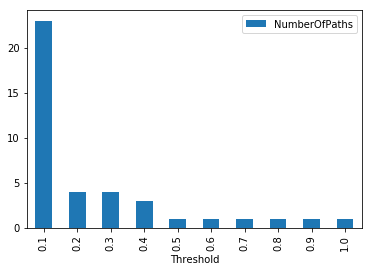

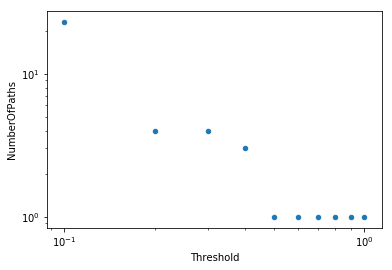

In [18]:
CutoffEffect.to_csv(dataPath/'orientExpress'/'CutoffEffect.dat', index=False)
CutoffEffect.plot(kind='bar',x='Threshold', y = 'NumberOfPaths')
CutoffEffect.plot(kind='scatter',x='Threshold', y = 'NumberOfPaths',loglog=True)

In [19]:
# recalculate paths
OrientExpressStoryStructure.savePathStats(dataPath/'orientExpress'/'allPaths.dat', 6)


Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped des

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


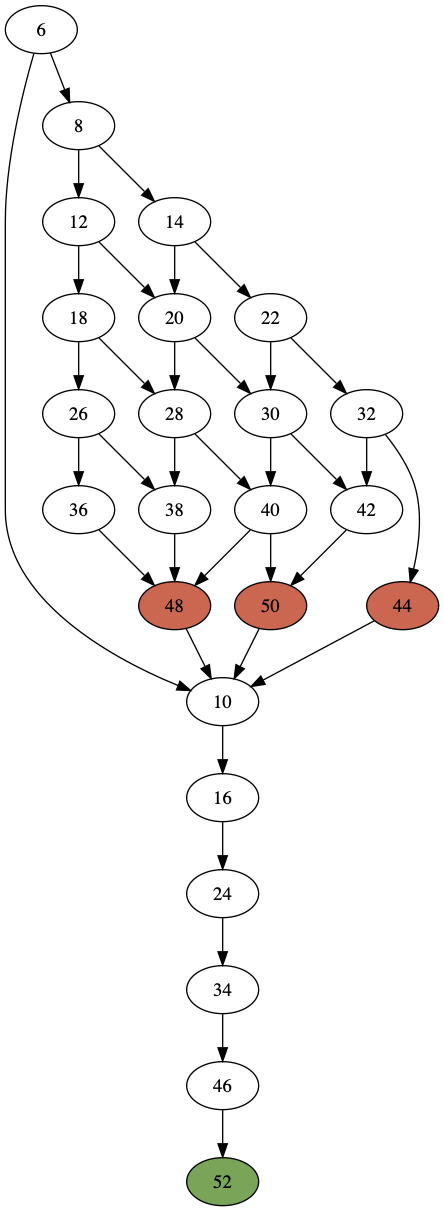

In [20]:
# cluster paths that are more than 10% similar to each other
OrientExpressStoryStructure.iterativeClusterPaths(0.1)
OrientExpressStoryStructure.pathsToEdgelist()
OrientExpressStoryStructure.saveFig(figPath/'orientExpressPathsClustered.png', noSingle=True)
i = Image(filename=str(figPath/'orientExpressPathsClustered.png'))
display(i)